In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA

from Data.prepare_fashion_mnist_dataset import FashionMnistData

In [2]:
data = FashionMnistData(path_to_folder="../raw_data", normalize=True)
X_train, y_train, X_test, y_test = data.get()

### Exploratory Data Analysis

In [3]:
print(f"{len(X_train)} Training Samples")
print(f"Number of features = {X_train.shape[1]}")
print(f"Classes = {list(set(y_train))}", end="\n\n")

def distribution(data_, data_set_type):
    classes, counts = np.unique(data_, return_counts=True)
    classes_count = dict(zip(classes, counts))
    return f"The distribution of classes in the {data_set_type} Data:\n{classes_count}"

print(distribution(y_train, data_set_type="Training"), end="\n\n")
print(distribution(y_test, data_set_type="Test"))

10000 Training Samples
Number of features = 784
Classes = [0, 1, 2, 3, 4]

The distribution of classes in the Training Data:
{0: 2033, 1: 1947, 2: 2001, 3: 2005, 4: 2014}

The distribution of classes in the Test Data:
{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000}


Note: Large amount of features (each image is 28x28 pixels resulting in 784 individual pixels)

Plotting samples from each class:

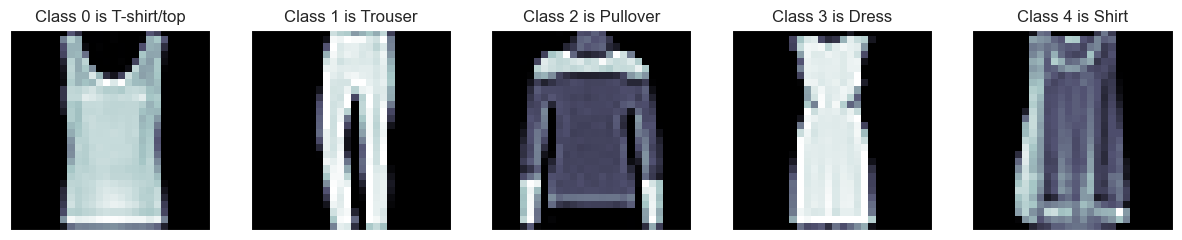

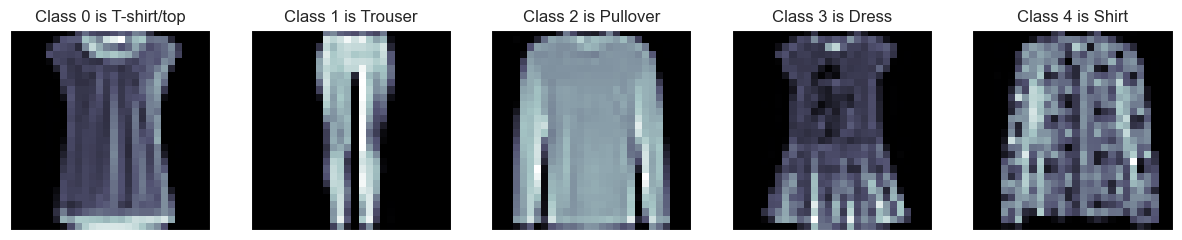

In [4]:
def extract_sample_in_class(X, y, cls):
    mask = np.where(y==cls)
    X = X[mask]
    x = random.choice(X).reshape(28, 28)
    return x

def plot_sample_from_each_class():
    s0 = extract_sample_in_class(X_train, y_train, 0)
    s1 = extract_sample_in_class(X_train, y_train, 1)
    s2 = extract_sample_in_class(X_train, y_train, 2)
    s3 = extract_sample_in_class(X_train, y_train, 3)
    s4 = extract_sample_in_class(X_train, y_train, 4)
    samples = [s0, s1, s2, s3, s4]
    titles = ["Class 0 is T-shirt/top", "Class 1 is Trouser",
             "Class 2 is Pullover", "Class 3 is Dress", "Class 4 is Shirt"]

    fig = plt.figure(figsize=(15,6))
    for j in range(len(samples)):
        ax_ = fig.add_subplot(1, 5, j+1, xticks=[], yticks=[])
        ax_.imshow(samples[j], cmap=plt.cm.bone, interpolation='nearest')
        plt.title(titles[j])

plot_sample_from_each_class()
plot_sample_from_each_class()

Next we want to explore the world of dimensionality reduction
<font size="2">References: https://shankarmsy.github.io/posts/pca-sklearn.html</font>


Number of components needed to surpass 0.9 = 61


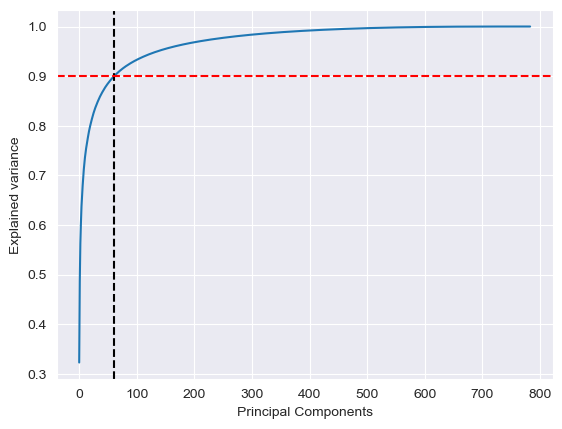

In [5]:
# How many PCA's do we need to explain 90 % of variance?
pca = PCA()
pca.fit_transform(X_train)

explained_variance_threshold = 0.9
var_cum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(var_cum>explained_variance_threshold)

print(f"Number of components needed to surpass {explained_variance_threshold} = {n_components}")

# plotting relationship between adding more PCA's and total explained variance
_, ax = plt.subplots()
ax.plot(var_cum)
plt.ylabel('Explained variance')
plt.xlabel('Principal Components')
plt.axvline(x=n_components, color="k", linestyle="--")
plt.axhline(y=explained_variance_threshold, color="r", linestyle="--");

In [6]:
def plot_images(X, n, reshape=(28,28)):
    """plot images in data from X with shape = (n, 784)"""
    fig_ = plt.figure(figsize=(6,6))
    fig_.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for j in range(n):
        ax_ = fig_.add_subplot(5, 5, j+1, xticks=[], yticks=[])
        ax_.imshow(X[j].reshape(reshape), cmap=plt.cm.bone, interpolation='nearest')

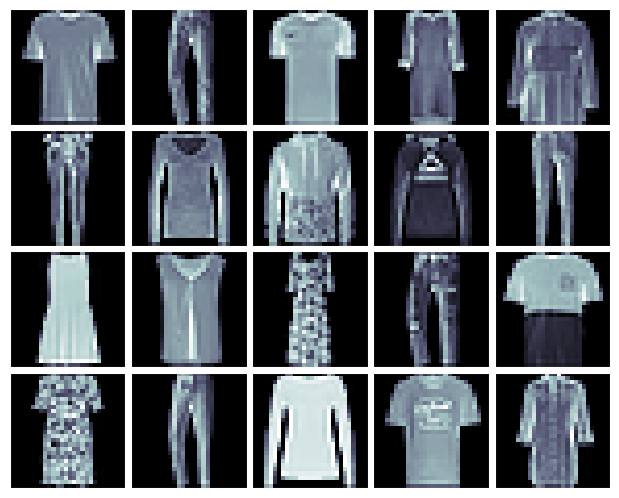

In [7]:
# plotting Images from our original dataset to compare with PCA reconstruction later
plot_images(X_train, 20)

In [8]:
# Training PCA with 61 components
pca_61 = PCA(n_components=61)
X_pca = pca_61.fit_transform(X_train)

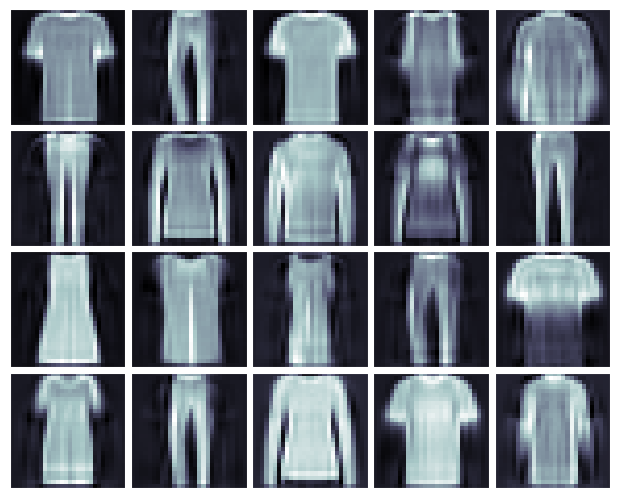

In [9]:
# Applying PCA and reconstructing the images
# This is done to see how well the PCA can reproduce our images
# The better the reproduction the better a classifier will be able to train on PCA's
# with good accuracy.
X_inv_proj = pca_61.inverse_transform(X_pca)  # reconstruct original images (10% information was lost) due to PCA
plot_images(X_inv_proj, 20)

Some detail was lost after reconstruction however shape is intact.
It seems like using PCA could be useful as it will significantly improve performance of training
allowing for more complex models.

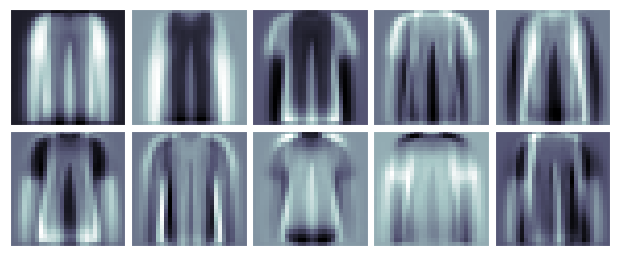

In [10]:
# Below we'll try to visualize the top 10 principal components.
# This is NOT a reconstruction of the original data,
# just visualizing the principal components as images.
plot_images(pca_61.components_, n=10)